In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import glob
import os.path
import pandas as pd

from scipy.signal import find_peaks

from scipy.signal import savgol_filter # not tried yet, but smoothing might help with some of the peak finding and with noisy data?

In [89]:
dataX_raw, dataY_raw = np.loadtxt("bleach/A_CL_T2.csv", skiprows = 21, usecols = (2,3), delimiter = ',', unpack = True)

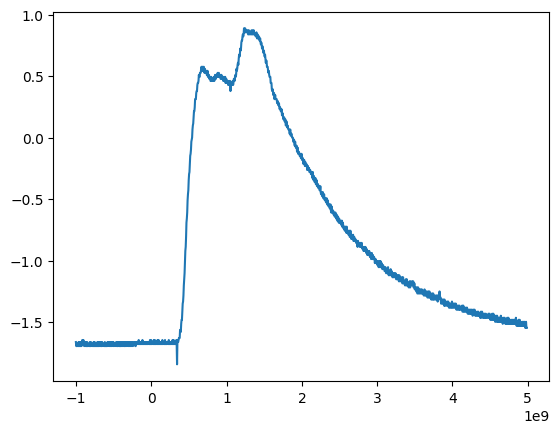

In [90]:
plt.plot(dataX_raw, dataY_raw)

In [91]:
def exponential(x, a, k, b):
    return a*np.exp(-k*x) + b

In [92]:
peaks, heights = find_peaks(dataY_raw, height = 0.25, distance = 100)

peak_x = dataX_raw[peaks]
peak_y = dataY_raw[peaks]

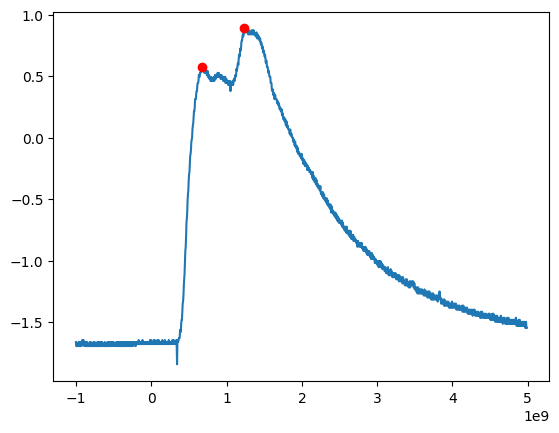

In [93]:
# plot the peaks
plt.plot(dataX_raw, dataY_raw)
plt.plot(peak_x, peak_y, 'or')

In [94]:
last_peak_index = peaks[-1]

In [95]:
decay_x = dataX_raw[last_peak_index:]  # x values after the last peak
decay_y = dataY_raw[last_peak_index:]  # y values after the last peak


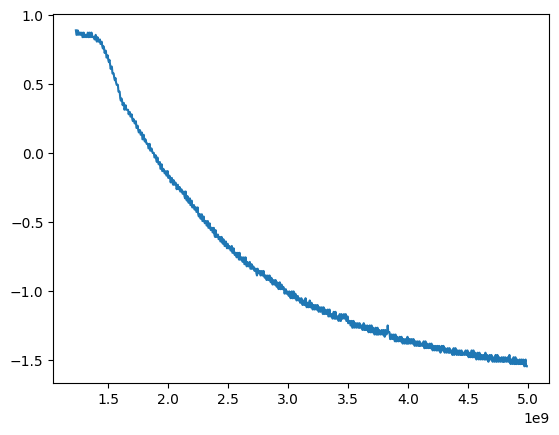

In [96]:
plt.plot(decay_x, decay_y)

In [100]:
# Initial guesses for parameters
import math

A_guess = peak_y[-1]  # Height of the last peak
k_guess = .000000001  # Initial guess for decay rate
B_guess = decay_y[-1]  # Approximation of the asymptote

# could caluate k_guess
k_guess_calculate = math.log(abs(dataY_raw[-1]/peak_y[-1])) / (dataX_raw[-1] - peak_x[-1])  
print(k_guess_calculate)

initial_guesses = [A_guess, k_guess_calculate, B_guess]
p0 = (2, .000000001, -1.5)

1.4742306800684322e-10


In [101]:
popt, pcov = curve_fit(exponential, decay_x, decay_y, p0=initial_guesses)
A_fit, k_fit, B_fit = popt

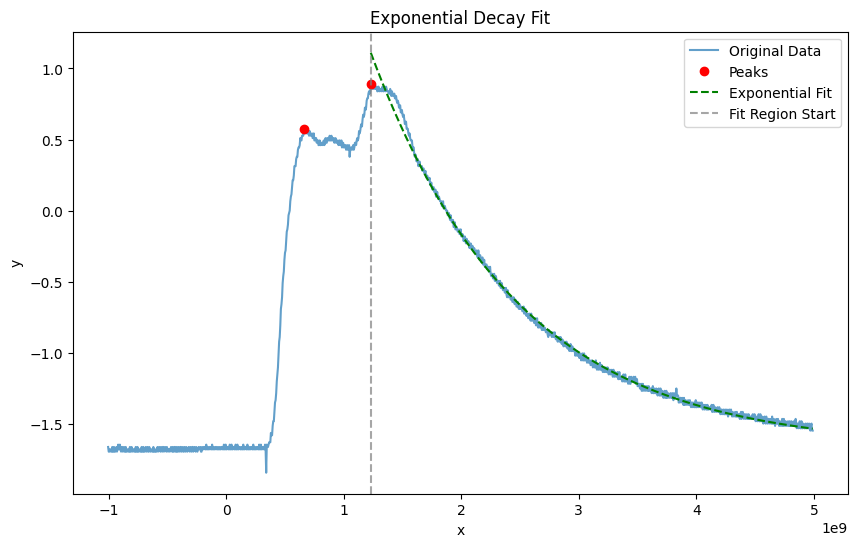

In [ ]:
# plot original data, peak, and the fit
plt.figure(figsize=(10, 6))
plt.plot(dataX_raw, dataY_raw, label="Original Data", alpha=0.7)
plt.plot(peak_x, peak_y, 'ro', label="Peaks")
plt.plot(decay_x, exponential(decay_x, *popt), 'g--', label="Exponential Fit")
plt.axvline(x=decay_x[0], color='gray', linestyle='--', alpha=0.7, label="Fit Region Start")
plt.title("Exponential Decay Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [53]:
import glob

In [54]:
file_location = os.path.join('bleach', "*.csv")
print(file_location)
files = glob.glob(file_location)

bleach/*.csv


No peaks found for bleach/A_CL_T1.csv
No peaks found for bleach/A_CL_T3.csv


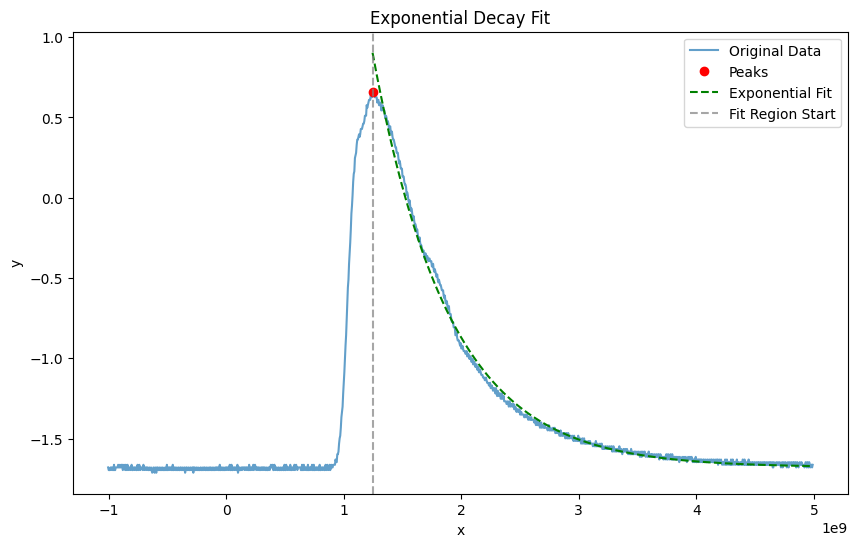

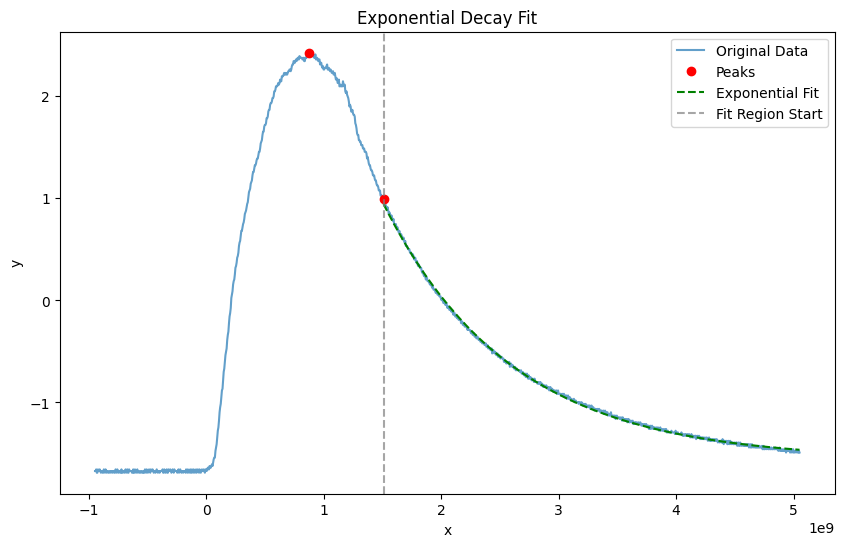

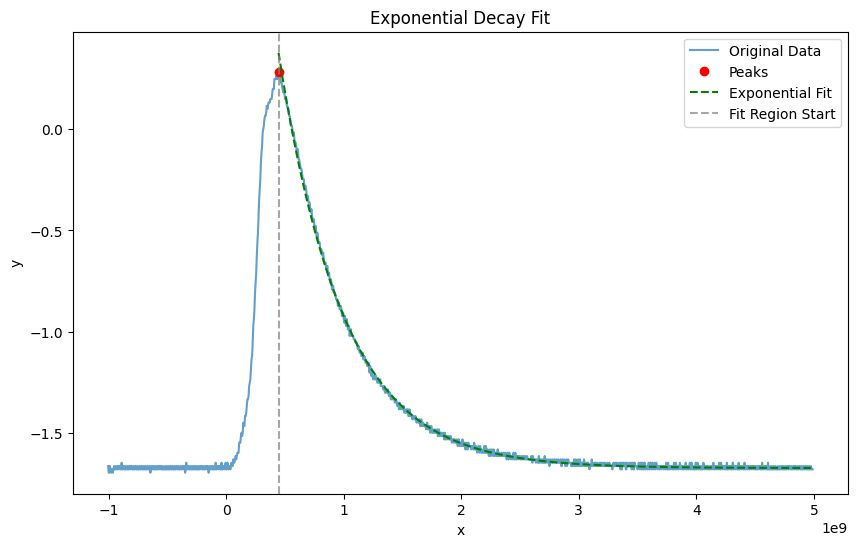

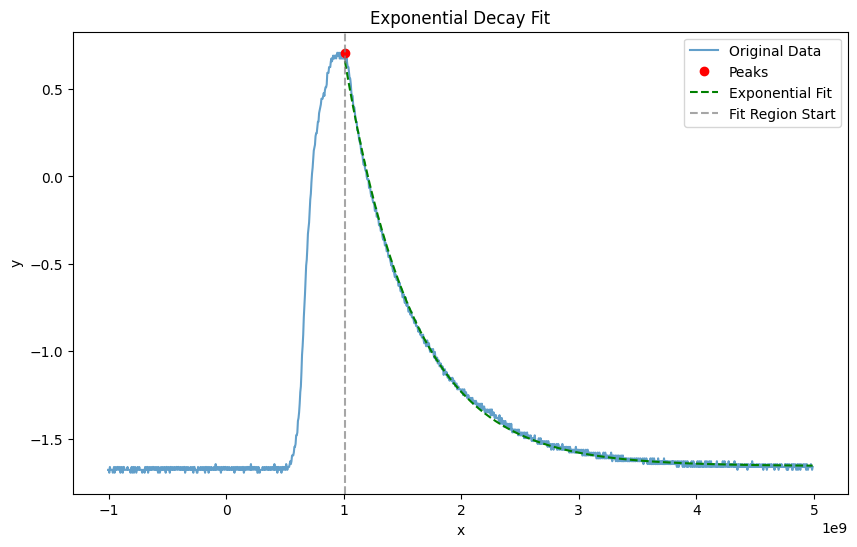

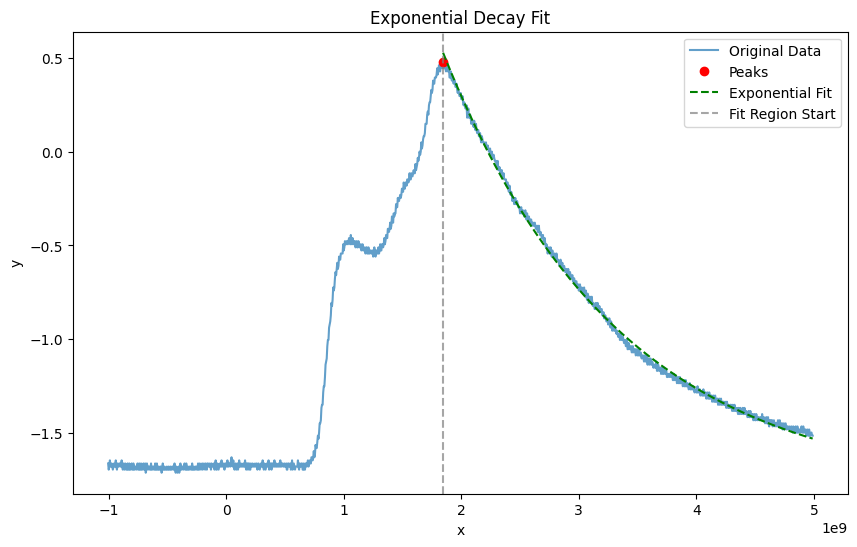

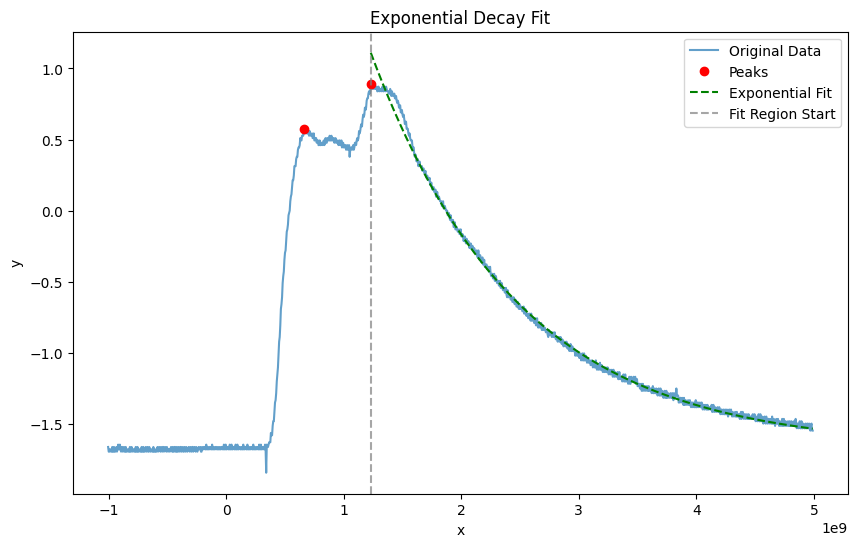

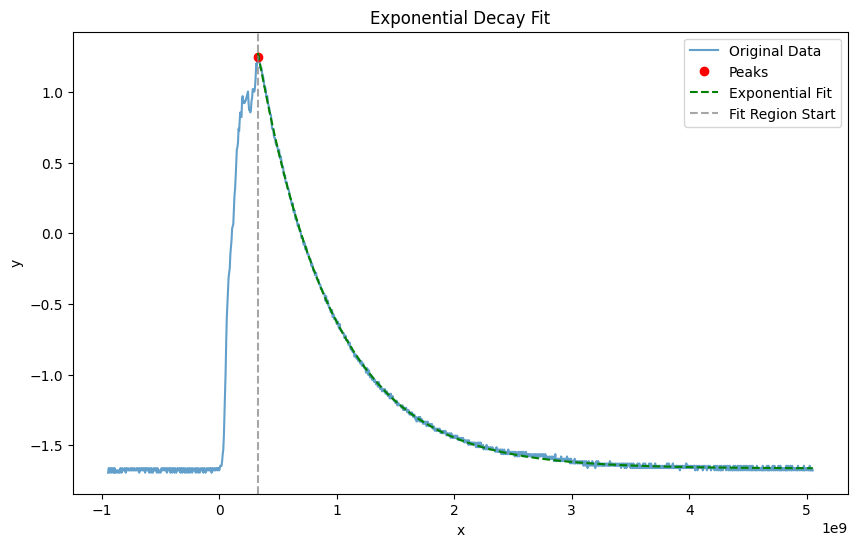

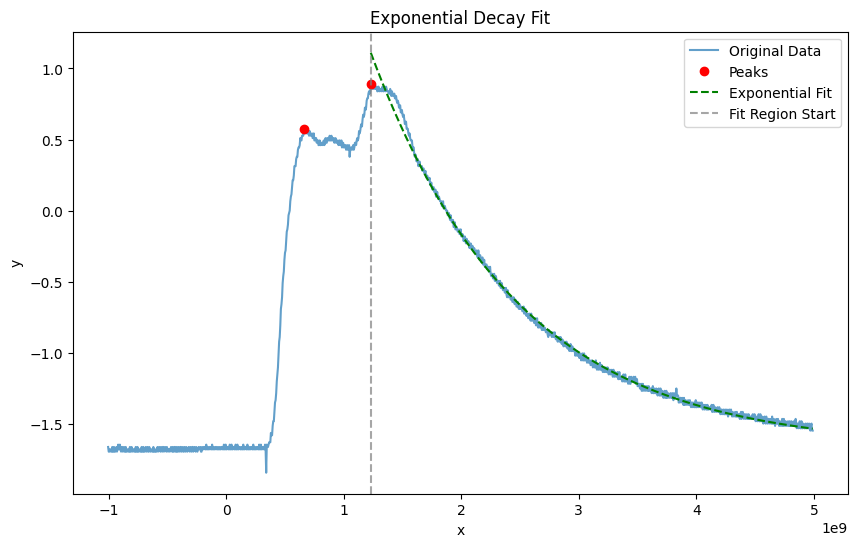

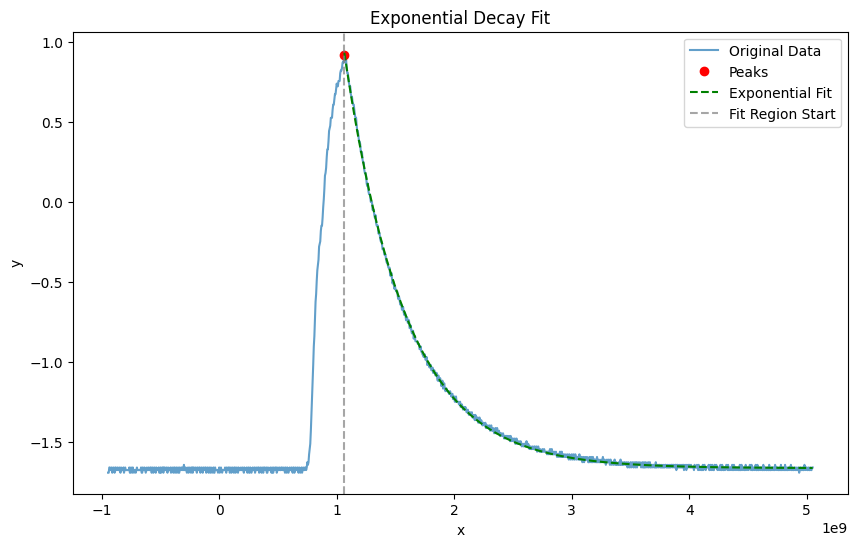

In [ ]:
for file in files:

    # open the file
    dataX_raw, dataY_raw = np.loadtxt(file, skiprows = 21, usecols = (2,3), delimiter = ',', unpack = True)

    # find peaks
    peaks, _ = find_peaks(dataY_raw, height = 0.25, distance = 100)

    # get the peaks
    peak_x = dataX_raw[peaks]
    peak_y = dataY_raw[peaks]

    if len(peaks) > 0:
        last_peak_index = peaks[-1]
        #print(last_peak_index)
        last_peak_x = dataX_raw[last_peak_index]    
        last_peak_y = dataY_raw[last_peak_index]

        # Get guess for exponential fit
        A_guess = peak_y[-1]  # Height of the last peak
        k_guess = .000000001  # Initial guess for decay rate
        B_guess = decay_y[-1]  # Approximation of the asymptote

        # exponential decay function
        k_guess_calculate = math.log(abs(dataY_raw[-1]/peak_y[-1])) / (dataX_raw[-1] - peak_x[-1])  
        #print(k_guess_calculate)

        initial_guesses = [A_guess, k_guess_calculate, B_guess]
        decay_x = dataX_raw[last_peak_index:]  # x values after the last peak
        decay_y = dataY_raw[last_peak_index:]  # y values after the last peak

        # Fit the data
        popt, pcov = curve_fit(exponential, decay_x, decay_y, p0=initial_guesses)

        # Extract fitted parameters
        A_fit, k_fit, B_fit = popt

        # Plot original data, peak, and the fit
        plt.figure(figsize=(10, 6))
        plt.plot(dataX_raw, dataY_raw, label="Original Data")
        plt.plot(peak_x, peak_y, 'ro', label="Peaks")
        plt.plot(decay_x, exponential(decay_x, *popt), 'g--', label="Exponential Fit")
        plt.axvline(x=last_peak_x, color='gray', linestyle='--', alpha=0.7, label="Fit Region Start")   
        plt.title("Exponential Decay Fit")
        plt.xlabel("x")
        plt.ylabel("y") 
        plt.legend()
    else:
        # we might need to do these "by hand"
        print(f"No peaks found for {file}")


    

